In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pygimli as pg
from pygimli.physics import ert

# November 24 ERT 1

In [2]:
data3 = ert.load('Surveys/full_data/nov24_1 - trim.dat')
print(data3)

Data: Sensors: 64 data: 1277, nonzero entries: ['a', 'b', 'ip', 'm', 'n', 'rhoa', 'valid']


In [3]:
data3["k"] = ert.geometricFactors(data3)
data3["err"] = ert.estimateError(data3, relativeError=0.02, absoluteUError=50e-6)

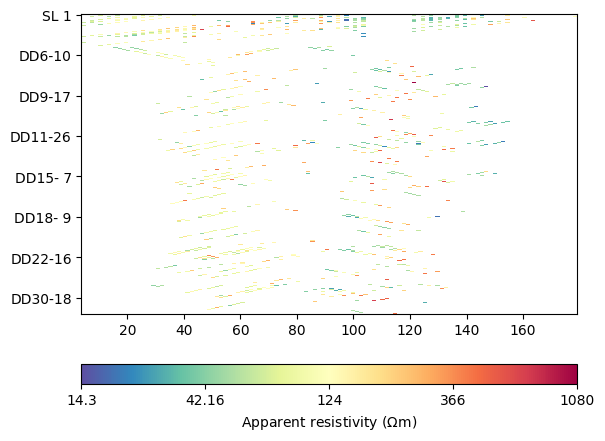

In [4]:
ax, cb = ert.show(data3)

<Axes: ylabel='Count'>

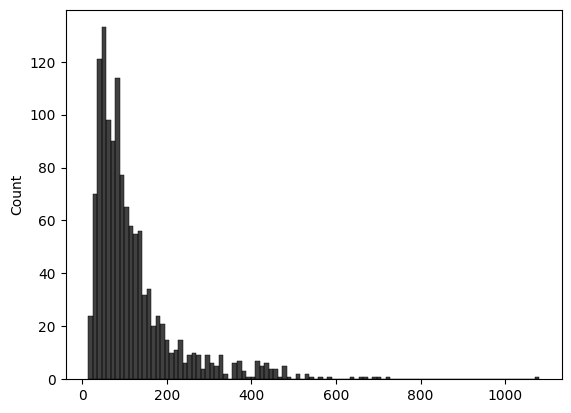

In [5]:
import seaborn as sns
sns.histplot(data3["rhoa"], bins=100, color="k", label="rhoa")

<Axes: ylabel='Count'>

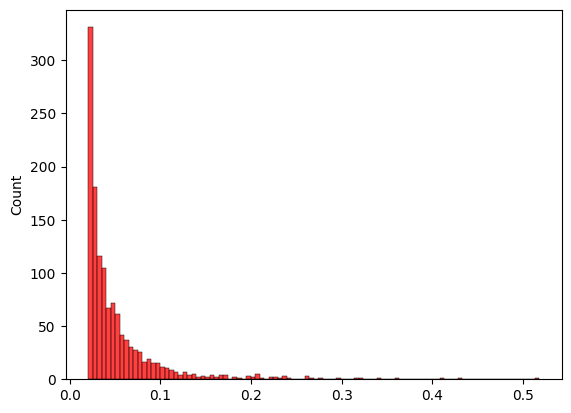

In [6]:
sns.histplot(data3["err"], bins=100, color="r", label="err")

In [8]:
import numpy as np
import pandas as pd

data3_rhoa_array = np.array(data3["rhoa"])
data3_rhoa_series = pd.Series(data3_rhoa_array)
quantile_99 = data3_rhoa_series.quantile(0.99)
quantile_99

511.20000000000005

In [8]:
# data3.remove(data3["rhoa"] > quantile_99)

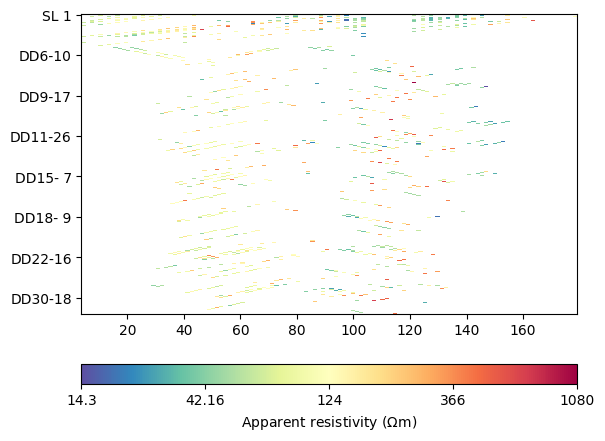

In [9]:
ax, cb = ert.show(data3)

In [10]:
mgr3 = ert.ERTManager(data3, verbose=True)
mgr3.invert(secNodes=1, paraMaxCellSize=10.0, 
            zWeight=0.2, verbose=1)

21/02/24 - 15:09:11 - pyGIMLi - INFO - Found 2 regions.
21/02/24 - 15:09:11 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
21/02/24 - 15:09:11 - pyGIMLi - INFO - Found 2 regions.
21/02/24 - 15:09:11 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
21/02/24 - 15:09:11 - pyGIMLi - INFO - Creating forward mesh from region infos.


Constructing Delaunay triangulation by divide-and-conquer method.
Delaunay milliseconds:  0
Recovering segments in Delaunay triangulation.
Segment milliseconds:  0
Removing unwanted triangles.
Spreading regional attributes and area constraints.
Hole milliseconds:  0
Adding Steiner points to enforce quality.
Quality milliseconds:  3

Writing vertices.
Writing triangles.
Writing segments.
Writing edges.

Output milliseconds:  0
Total running milliseconds:  4

Statistics:

  Input vertices: 135
  Input segments: 136
  Input holes: 0

  Mesh vertices: 2191
  Mesh triangles: 4211
  Mesh edges: 6401
  Mesh exterior boundary edges: 169
  Mesh interior boundary edges: 100
  Mesh subsegments (constrained edges): 269



21/02/24 - 15:09:11 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
21/02/24 - 15:09:11 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 8592 Cells: 16844 Boundaries: 12802
21/02/24 - 15:09:11 - pyGIMLi - INFO - Use median(data values)=87.9
21/02/24 - 15:09:11 - pyGIMLi - INFO - Created startmodel from forward operator: 3379 [87.9,...,87.9]
21/02/24 - 15:09:11 - pyGIMLi - INFO - Starting inversion.


ModellingBase::setMesh() copying new mesh ... Found topography for surface=1518.6 : 1518.48
Found datafile: 64 electrodes
Found: 64 node-electrodes
rMin = 1.51017, rMax = 382.049
NGauLeg + NGauLag for inverse Fouriertransformation: 14 + 4
Found non-Neumann domain
0.046865 s
FOP updating mesh dependencies ... 2.2e-06 s
min/max(dweight) = 1.92979/49.6184
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x7f6525dc59e0>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x7f650aedac00>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x7f650b123450>
min/max (data): 14.3/1080
min/max (error): 2.02%/51.82%
min/max (start model): 87.9/87.9
--------------------------------------------------------------------------------
use model trans from RegionManager
Calculating response for model: min = 87.9 max = 87.9
Allocating memory for primary potential...... 0.0428143

No primary potential for secondary field calculation with topography.
Creating 

3379 [37.5528085613866,...,97.39783029897458]

(1490.0, 1537.517944)

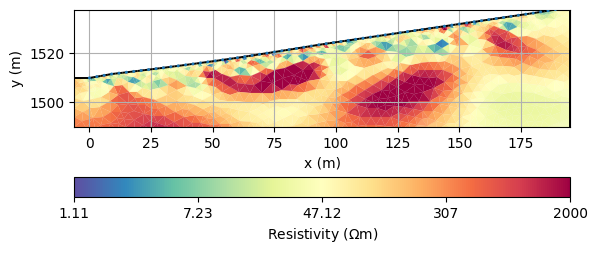

In [32]:
kw = dict(logScale=True, cMap="Spectral_r", xlabel="x (m)", ylabel="y (m)", cMin=0, cMax = 2000)
ax, cb = mgr3.showResult(**kw)
ax.grid(True)
ax.set_ylim([1490, ax.get_ylim()[1]])

array([<Axes: >, <Axes: >], dtype=object)

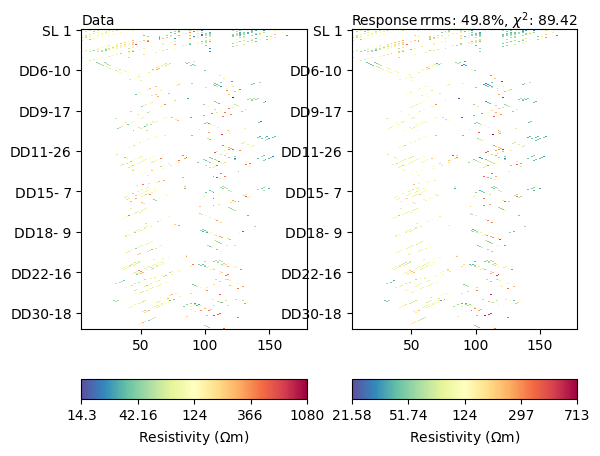

In [34]:
mgr3.showFit()